### use Long Short Term Memory(LSTM) artificial recurrent neural network to predict the closing stock price of a corporation using past 60 days stock price

In [2]:
!pip install pandas_datareader
!pip install sklearn
!pip install matplotlib

In [3]:
!pip install keras

In [4]:
import math
import numpy as np
import pandas as pd

In [5]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas_datareader as web
import tensorflow 
plt.style.use('fivethirtyeight')

In [6]:
from tensorflow.python import keras

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [8]:
df = web.DataReader('AAPL',data_source='yahoo',start='2019-01-01',end='2021-07-31')

In [9]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,39.840000,39.119999,39.632500,39.435001,140014000.0,38.395920
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.088364
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.008041
...,...,...,...,...,...,...
2021-07-26,149.830002,147.699997,148.270004,148.990005,72434100.0,148.990005
2021-07-27,149.210007,145.550003,149.119995,146.770004,104818600.0,146.770004
2021-07-28,146.970001,142.539993,144.809998,144.979996,118931200.0,144.979996


Text(0.5, 1.0, 'Close Price History')

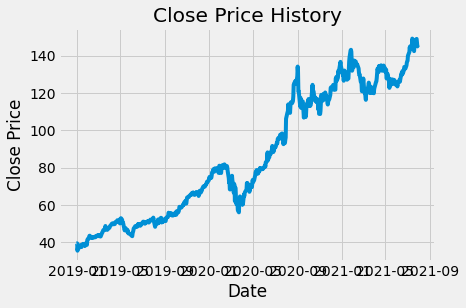

In [10]:
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price History')


Text(0.5, 1.0, 'Open Price History')

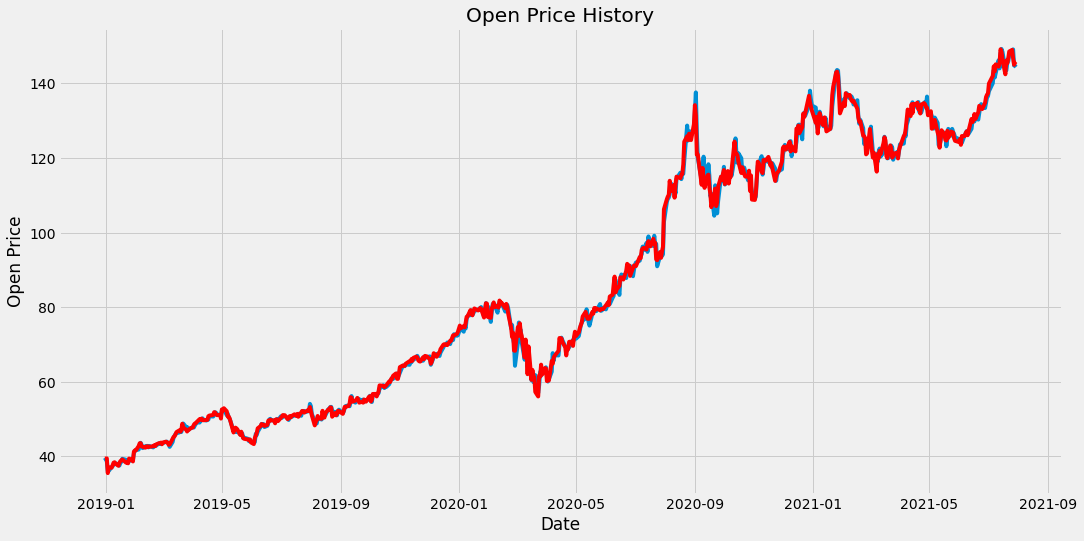

In [15]:
plt.figure(figsize=(16,8))
plt.plot(df['Open'])
plt.plot(df['Close'],'r')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price History')

In [33]:
dataset = df['Close'].values
dataset = dataset.reshape(651,1)

# Scaling

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03422021],
       [0.03461631],
       [0.        ],
       [0.01335796],
       [0.01263174],
       [0.01883761],
       [0.02447128],
       [0.02554962],
       [0.0222266 ],
       [0.01718712],
       [0.02394315],
       [0.02805836],
       [0.03008296],
       [0.03219561],
       [0.02444929],
       [0.02581368],
       [0.02312888],
       [0.0342642 ],
       [0.03105126],
       [0.02748617],
       [0.05074712],
       [0.05336591],
       [0.05354196],
       [0.06395106],
       [0.07039896],
       [0.07053103],
       [0.06326886],
       [0.06210251],
       [0.05994585],
       [0.06315882],
       [0.06159634],
       [0.06296077],
       [0.06212451],
       [0.06324683],
       [0.06566756],
       [0.06353293],
       [0.06773619],
       [0.070509  ],
       [0.07072908],
       [0.07191742],
       [0.06813229],
       [0.0721375 ],
       [0.07407409],
       [0.07336986],
       [0.07114721],
       [0.06670188],
       [0.06760415],
       [0.080

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train, test = train_test_split(scaled_data,train_size=0.67)

In [37]:
train.shape

(436, 1)

In [38]:
test.shape

(215, 1)

In [40]:
train_X= []
train_y= []

for i in range(60,len(train)):
    train_X.append(train[i-60:i,0])
    train_y.append(train[i,0])
    if i<= 61:
        print(train_X)
        print(train_y)
        

[array([0.27327744, 0.22010962, 0.83882398, 0.17277348, 0.27283735,
       0.79525102, 0.12743999, 0.21834908, 0.93758943, 0.63970868,
       0.38621511, 0.78715262, 0.2687001 , 0.13883937, 0.11443411,
       0.07235758, 0.84877099, 0.14704781, 0.76153696, 0.45670212,
       0.76928331, 0.13868535, 0.65242846, 0.07931162, 0.79243418,
       0.13107106, 0.38436657, 0.20690568, 0.13448208, 0.3419159 ,
       0.13637465, 0.02444929, 0.11256354, 0.13606656, 0.86804876,
       0.26308839, 0.34374248, 0.70088688, 0.8729782 , 0.75563921,
       0.03008296, 0.79859599, 0.13718888, 0.71585138, 0.8442817 ,
       0.32028348, 0.03422021, 0.86223899, 0.1255254 , 0.85167587,
       0.23452388, 0.919104  , 0.89190379, 0.89542492, 0.23516209,
       0.96699016, 0.81215204, 0.25006054, 0.22609537, 0.70220729])]
[0.2946898430407413]
[array([0.27327744, 0.22010962, 0.83882398, 0.17277348, 0.27283735,
       0.79525102, 0.12743999, 0.21834908, 0.93758943, 0.63970868,
       0.38621511, 0.78715262, 0.2687

In [41]:
train_X ,train_y= np.array(train_X),np.array(train_y)
